### Preamble: Dependencies & Configuration


#### Python future

The default behavior of the division operator `/` is confusing:

In [1]:
1 / 2

0

The Python 3 behavior is simpler, let's use it

In [2]:
from __future__ import division

In [3]:
1 / 2

0.5

#### NumPy

In [4]:
from numpy import *

#### Matplotlib

To get decent defaults for `matplotlib` plots, we need an estimate of the screen DPI (number of dots per inch).
On my (Linux) computer , the command

    $ xrandr | grep -w connected
    eDP1 connected primary 1600x900+0+0 (normal left inverted right x axis y axis) 346mm x 194mm

provides the required data.

In [5]:
width_cm = 34.6
width_inches = width_cm / 2.54
dpi = 1600 / width_inches
dpi

117.45664739884393

In [6]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}

import matplotlib as mpl
ratio = 16 / 9
width = 7.0 # inches
height = width / ratio
mpl.rcParams["figure.figsize"] = (width, height)
mpl.rcParams['savefig.dpi'] = mpl.rcParams['figure.dpi'] = dpi

from matplotlib.pyplot import *

#### IPython

In [7]:
from IPython.display import display, Audio, Markdown

#### Audio

The `audio` package is a collection of Python modules developped for this course:

  - use `audio.wave` to read/write WAVE files,
    
  - use `audio.bitstream` to read/write binary data.

In [8]:
import audio.wave

In [9]:
from audio.bitstream import BitStream
import warnings; warnings.simplefilter('ignore', DeprecationWarning)

-----

# WAVE Lab

## Synthesis of Pure Tones

The analog audio signal
$\mathrm{A}_4(t) = \sin (2 \pi \times 440.0  \times t), \; t \in \mathbb{R}$,
is a pure tone with amplitude $1.0$ and frequency $440.0$ Hz.

In [10]:
f = 440.0 # Hz

The Compact Disc Digital Audio (CDDA) *sample rate* is $44100$ Hz.

In [11]:
df = 44100

The corresponding *sampling period* `dt` is given by:

In [12]:
dt = 1.0 / df # sec

Consider a time span of $T=3$ seconds; 
the array `t` of all instants in $[0, T)$ that are multiples of `dt` can be built with:

In [13]:
T = 3.0
t = r_[0.0:T:dt]

The array `A4` of sampled values of $\mathrm{A}_4$ at these instants is:

In [14]:
A4 = sin(2*pi*f*t)

We can plot a 10 ms frame of this discrete-time signal:     

<IPython.core.display.Javascript object>


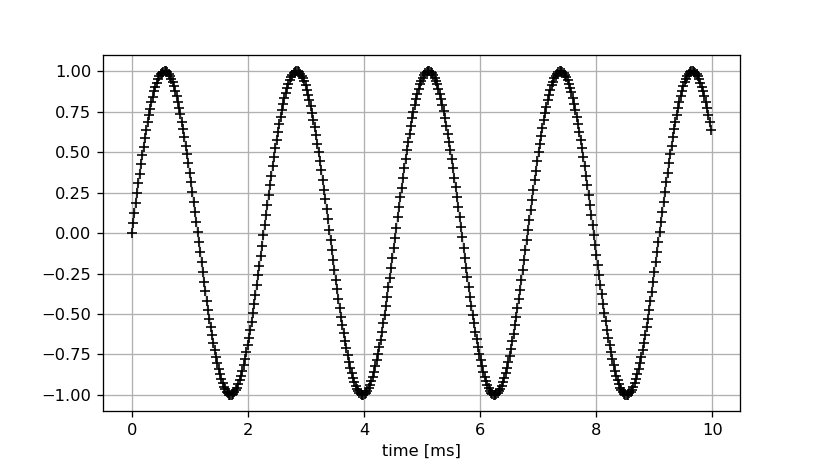

In [15]:
fig, axes = subplots()
tau = 10 / 1000
tf = t[t < tau]
A4f = A4[t < tau]
axes.plot(1000 * tf, A4f, "k-", alpha=0.2)
axes.plot(1000 * tf, A4f, "k+")
axes.set_xlabel("time [ms]")
axes.grid()

We save the sampled signal `A4` as a WAVE file named `"A4.wav"` and display an audio player.  

In [16]:
audio.wave.write(A4, "A4.wav")
Audio("A4.wav")

The notation "$\mathrm{A}_4$" comes from the [scientific pitch notation][spn], 
a convention that defines the frequency of symbols.
These symbols are composed of a letter followed by a number that identifies the pitch octave. 
The following table displays such frequencies for the letter "A":

|     Symbol        |   $f$ (Hz) |
|-------------------|------------|
| $\mathrm{A}_0$    |      27.5  |
| $\mathrm{A}_1$    |      55.0  |
| $\mathrm{A}_2$    |     110.0  |
| $\mathrm{A}_3$    |     220.0  |
| $\mathrm{A}_4$    |     440.0  |
| $\mathrm{A}_5$    |     880.0  |
|    ...            |       ...  |
| $\mathrm{A}_{9}$  |   14080.0  |
| $\mathrm{A}_{10}$ |   28160.0  |
     
[spn]: http://en.wikipedia.org/wiki/Scientific_pitch_notation

We implement a function `make_tone` that given such a `symbol` argument: 

  - returns the values of a 3-sec. audio frame,

  - creates a WAVE file whose name is `symbol + ".wav"`.



In [17]:
def make_tone(symbol):
    number = int(symbol[1:])
    f = 27.5 * 2 ** number
    x = sin(2*pi*f*t)
    audio.wave.write(x, symbol + ".wav")
    return x

For example:

In [18]:
A5 = make_tone("A5")
Audio("A5.wav")

## Sound Pressure Level and Loundness

Create the pure tones `A0` to `A10` and the corresponding WAVE files.

In [19]:
A = []
for i in range(0, 11):
    symbol = "A" + str(i)
    A.append(make_tone(symbol))

### Sound power

The function `SPL` computes the *sound pressure level* (SPL) in decibels of the signal `x` in $[-1.0, 1.0]$
  $$
  L(x)= 96.0 + 10 \log_{10} \left< \mathtt{x}^2 \right>  \; \mbox{[dB]} 
  $$
The expression $\left<\mathtt{y}\right>$ denotes the mean value of $\mathtt{y}$.

In [20]:
def L(x):
    return 96.0 + 10.0 * log10(mean(x*x))

We can see that the SPL of every tone $A_i$ is (approximately) the same. 

<IPython.core.display.Javascript object>


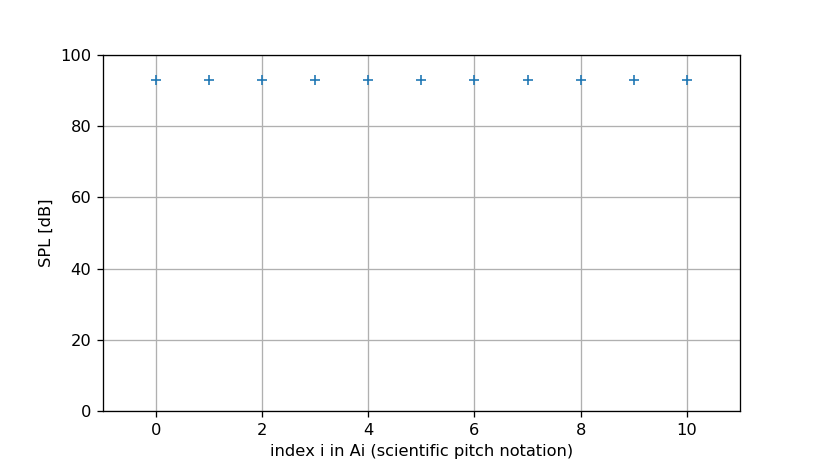

In [21]:
L_i = [L(A_i) for A_i in A]
fig, axes = subplots()
axes.axis([-1,11, 0.0, 100.0])
axes.plot(L_i, "+")
axes.set_ylabel("SPL [dB]")
axes.set_xlabel("index i in Ai (scientific pitch notation)")
axes.grid()

That makes sense since for any sine wave `x` of amplitude $1.0$ and frequency $f$,
if the sampling is fast enough, the mean value is given by:
  $$
  \left< x^2 \right> \simeq \frac{1}{T} \int_0^{T} \sin^2(2 \pi f t) \, dt = \frac{1}{2}
  $$
where $T = 1/ f$ is the signal period.

Thus,
  $$
  L(x) \simeq 96.0 + 10.0 \log_{10}(0.5)
  $$

Now, compare this value

In [22]:
96.0 + 10.0 * log10(0.5)

92.989700043360187

and for example

In [23]:
L(A[4])

92.989700043360187

### Listening tests:

Play the audio files `"A0.wav"` to `"A10.wav"`. 
Is the loudness of the sounds constant across the octaves ? 
What does it mean ? 

In [24]:
for i, A_i in enumerate(A):
    symbol = "A" + str(i)
    display(Audio(symbol + ".wav"))

Does the frequency of `"A10.wav"` feel very different from the frequency of `"A9.wav"` ? Can you make sense of that ?

In [25]:
message = "The frequency of $A_9$ is ${0}$ Hz and the frequency of $A_{{10}}$ is ${1}$ Hz".format(27.5 * 2 **9, 27.5 * 2**10)
Markdown(message)

The frequency of $A_9$ is $14080.0$ Hz and the frequency of $A_{10}$ is $28160.0$ Hz

In [26]:
display(Audio("A9.wav"))
display(Audio("A10.wav"))

## WAVE Format Header Analysis

The WAVEform audio file format – or WAVE for brevity – is a Microsoft and IBM digital audio file format. 
It is a subset of Microsoft’s Resource Interchange File Format (RIFF) specification for multimedia file. 
The WAVE format supports several types of compressions, but we will deal only with the uncompressed
format (also referred to as 16-bit linear PCM, for “Pulse Code Modulation”).

This "canonical" WAVE format is described here: <http://soundfile.sapp.org/doc/WaveFormat/>

WAVE files can be identified by the first 12 data bytes: 

In [27]:
raw = open("A4.wav").read() # raw is a 'str' (string)
raw[:4], raw[8:12]

('RIFF', 'WAVE')

The same process can be done with `bitstream`:

In [28]:
raw = open("A4.wav").read()
stream = BitStream(raw)
R = stream.read(str, 4)
_ = stream.read(str, 4)
W = stream.read(str, 4)
R, W

('RIFF', 'WAVE')

Since `bitstream` can read fixed-size integer types, 
it's probably easier to use it to read additional info in the file, 
such as the number of channels of the sampling frequency:

In [29]:
raw = open("A4.wav").read()
stream = BitStream(raw)
_ = stream.read(str, 22)
print stream.read(uint16).newbyteorder() # 2-byte integer (little end.)
print stream.read(uint32).newbyteorder() # 4-byte integer (little end.)

1
44100


## Quantization and Signal-to-Noise Ratio

We can load the digital audio data in `"A4.wav"` as an array of floats in the $[-1.0, 1.0]$ range that we name `A4_wav`.

In [30]:
A4_wav = audio.wave.read("A4.wav")[0] # remember to *unwrap* the data in the first channel

If we plot `A4_wav` alongside `A4`, and zoom in really close, we can detect some small differences in their values. 

<IPython.core.display.Javascript object>


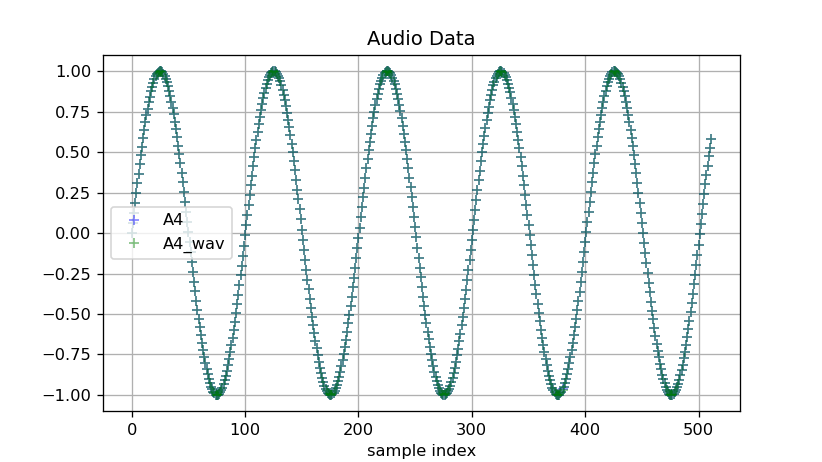

In [31]:
fig, axes = subplots()
axes.plot(A4[:512], "b+", alpha=0.5, label="A4")
axes.plot(A4_wav[:512], "g+", alpha=0.5, label="A4_wav")
axes.set_xlabel("sample index")
axes.set_title("Audio Data")
axes.legend()
axes.grid()

The *quantization error* -- or *quantization noise* -- `e`, 
is the difference between `A4_wav` and the original array `A4`.

<IPython.core.display.Javascript object>


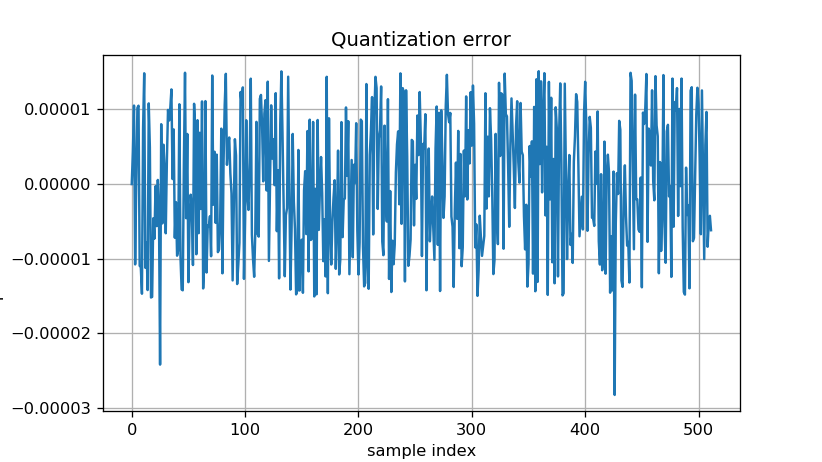

In [32]:
e = A4_wav - A4
fig, axes = subplots()
axes.plot(e[:512])
axes.set_xlabel("sample index")
axes.set_ylabel("quantization error")
axes.set_title("Quantization error")
axes.grid()

The quantization *signal-to-noise ratio* (SNR) in decibels is given by:

  $$
  \mathrm{SNR} \; \mathrm{[dB]} = 10 \log_{10} \mathrm{SNR}^2
  \; \mbox{ where } \;
  \mathrm{SNR}^2 = \frac{\left< \mathtt{A4}^2 \right>}{\left< \mathtt{e}^2 \right>}
  $$

In [33]:
SNR = sqrt(mean(A4*A4) / mean(e * e))
20.0 * log10(SNR)

98.060123518090677

In [34]:
print 20.0 * log10(SNR) # SNR in dB

98.0601235181


## Fading: Frames and Windows


The tones that we have generated so far do not start or end smoothly
and the transition from one tone to another is not smooth either.
Such fade in, fade out and cross-fading may be implemented with windows.

A *window factory* or *family* is a function, that takes a length argument and returns a window of this length. 
A *window* is a one-dimensional array that is meant to be multiplied element-wise with the original signal.

The NumPy documentation provide access to some [classic windows][windows]. 

[windows]: http://docs.scipy.org/doc/numpy/reference/routines.window.html

<IPython.core.display.Javascript object>


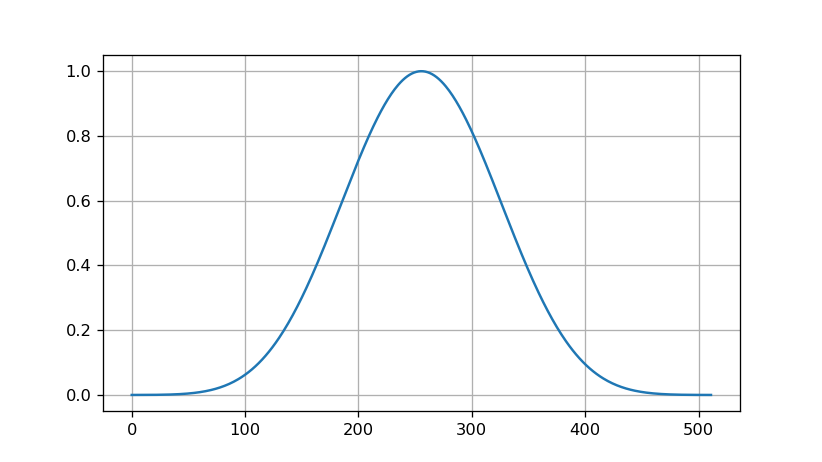

In [35]:
n = 512

# window = ones(n) # rectangular window
# window = bartlett(n) 
# window = blackman(n)
# window = hamming(n)
# window = hanning(n)
window = kaiser(n, beta=14.0)

fig, axes = subplots()
_ = axes.plot(window)
axes.grid()

<IPython.core.display.Javascript object>


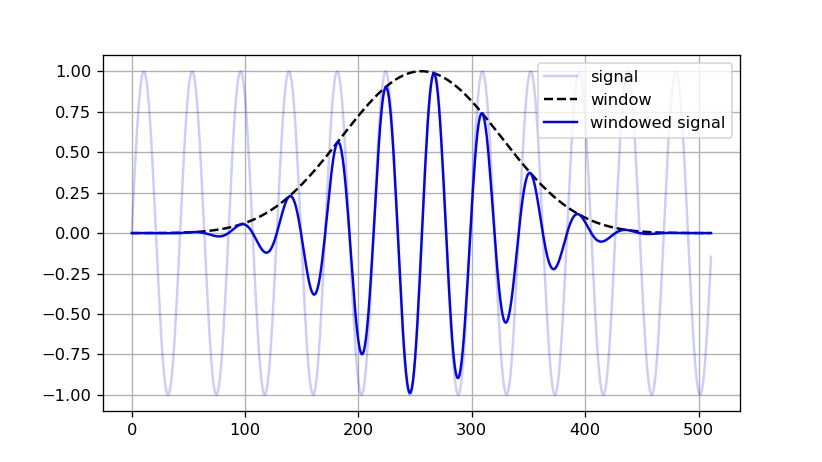

In [36]:
fig, axes = subplots()

periods = 12
x = sin(2 * pi * r_[0:periods:periods/n])

axes.plot(x, "b", alpha=0.2, label="signal")
axes.plot(window, "k--", label="window")
axes.plot(x * window, "b", label="windowed signal")
axes.legend()
axes.grid()

We can for example apply the Hanning window to the pure tone `A4` and listen to the result.

In [37]:
sound = hanning(len(A4)) * A4
audio.wave.write(sound, "A4-hanning.wav")
Audio("A4-hanning.wav")

Consider the signals `A0` to `A10`. 
Create a single "blended" (crossfaded) signal that merges windowed versions of these signals in sequence, with a 1.5 sec (50%) overlap between successive signals.

In [38]:
def display_cross_fading(window):
    n = 512
    window_1 = r_[window(n), zeros(n//2)]
    window_2 = r_[zeros(n//2), window(n)]
    fig, axes = subplots()
    axes.plot(window_1,"k--", alpha=0.5)
    axes.plot(window_2,"k--", alpha=0.5)
    axes.plot(window_1 + window_2, "k")
    axes.grid()

What if the successive signals are actually *frames* extracted from a common signal ? 
When does the merge between the frames reconstruct exactly the original signal ? 
This condition is referred to as Constant-OverLap-Add (or COLA). 

The standard Hanning window satisfies only roughly the COLA condition: 
if you zoom on the flat part of the graph you will see that the sum of two consecutive windows differs up to ~0.3%.
 

<IPython.core.display.Javascript object>


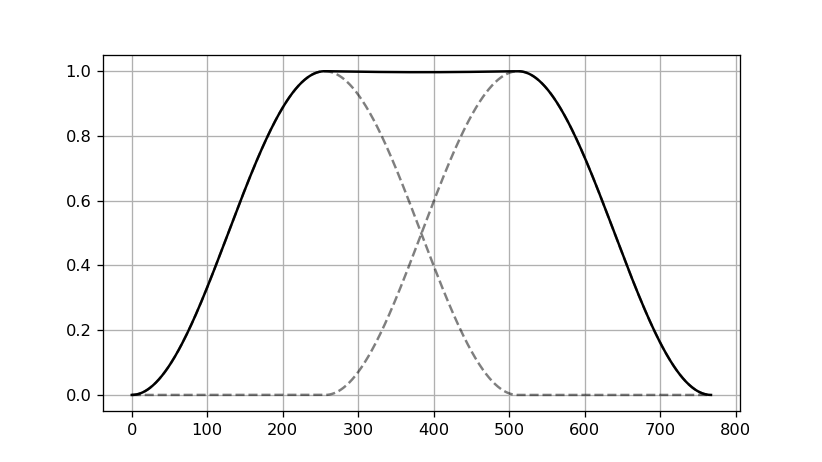

In [39]:
display_cross_fading(window=hanning)

Now on the other hand, we can define the window (factory) `hanning2` that given a length `n` returns the first `n` values of the `hanning`window of length `n + 1`. 
 

In [40]:
def hanning2(n):
    return hanning(n+1)[:-1]

This window satifies the COLA condition with a much higher precision (zoom on the plot).   

<IPython.core.display.Javascript object>


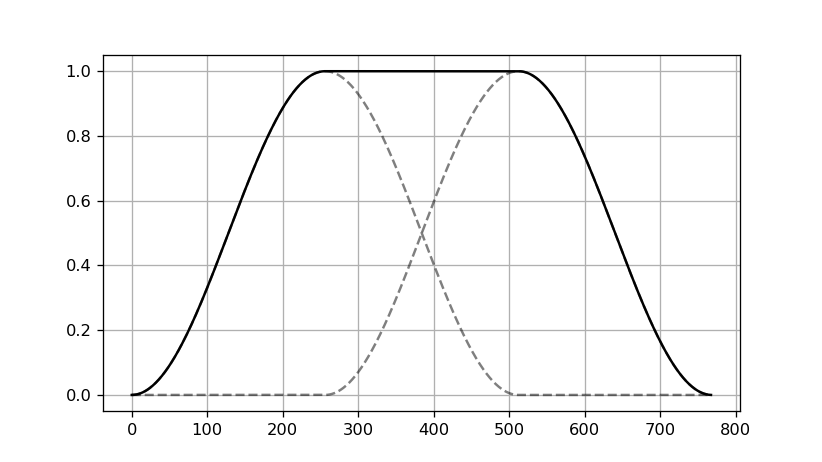

In [41]:
display_cross_fading(hanning2)

We can listen to the sequence of sounds in `A0`-`A10` with cross-fading.

In [42]:
window = ones
# window = hanning2

m = len(A)    # number of fragments
n = len(A[0]) # common fragment length
assert n % 2 == 0
output = np.zeros((m + 1) * (n // 2))
for i, A_i in enumerate(A):
    offset = i * (n // 2)
    output[offset:offset + n] += A_i * window(n)
audio.wave.write(output, "A-cross-fading.wav")
Audio("A-cross-fading.wav")